In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
test = pd.read_csv('./assests/test_indices.txt', header=None).squeeze("columns")
train = pd.read_csv('./assests/train_indices.txt', header=None).squeeze("columns")
data = pd.read_csv('./assests/boston_housing.txt', delim_whitespace=True, header=None, skiprows=49)

C:\Users\isang\AppData\Local\Temp\ipykernel_12252\2707084368.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('./assests/boston_housing.txt', delim_whitespace=True, header=None, skiprows=49)


In [22]:
train = train.astype(int)
test = test.astype(int)

In [23]:
columns = [ "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [24]:
data.columns = columns

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
train_data = data.iloc[train-1]
test_data = data.iloc[test-1]
train_data.columns = columns
test_data.columns = columns

In [27]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [28]:
train_y = train_data['MEDV']
train_x = train_data.drop("MEDV", axis=1)
test_y = test_data['MEDV']
test_x =test_data.drop("MEDV", axis=1)

In [29]:
train_x_transpose = train_x.T

In [30]:
beta = np.linalg.inv(train_x_transpose.dot(train_x)).dot(train_x_transpose).dot(train_y)
print(beta)

[-0.01751368  0.0496807   0.030441    3.79345291 -1.25859507  5.67159747
 -0.01298518 -1.08121818  0.19463677 -0.00986241 -0.32127186  0.01759703
 -0.52017921]


In [31]:
y_pred = train_x.dot(beta)
normal_rmse = rmse(train_y, y_pred)
print(normal_rmse)

4.943862345673566


# using linear regression model

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [33]:
lr.fit(train_x, train_y)

LinearRegression()

In [34]:
y_pred1 = lr.predict(test_x)
rmse_from_lr = rmse(test_y, y_pred1)
print(rmse_from_lr)

4.768646394167728


In [35]:
diff = rmse_from_lr - normal_rmse
print(diff)

-0.17521595150583824


# Evaluating my model

In [36]:
print("MSE: ", mse(test_y, y_pred1)) #mean square error
print("RMSE: ", rmse(test_y, y_pred1)) # root mean sqwuare error
print("R2: ", r2(test_y, y_pred1)) #r2 score generally lies betn 0-1 and higher the r2 score the model fits better

MSE:  22.73998843260888
RMSE:  4.768646394167728
R2:  0.7328056188558028


# prediciting the value form my rollnumber

In [37]:
my_roll_number = 34
roll_value = {
    'CRIM': 0.002 * my_roll_number,
    'NOX': 0.005 * my_roll_number + 0.35,
    'DIS': 1 + 0.1 * my_roll_number,
    'TAX': 200 + 3 * my_roll_number,
    'RAD': my_roll_number % 2,
    'ZN': 12.5,  # corrected here
    'INDUS': 7.0,
    'CHAS': 0,
    'RM': 6.3,
    'AGE': 60,
    'PTRATIO': 12,
    'B': 15,
    'LSTAT': 400
}
value = pd.Series(roll_value).dot(beta)
print(value)

1005.5569131810953


# what each coeffiecint would signify

In [38]:
# [ "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
print(beta)

[-0.01751368  0.0496807   0.030441    3.79345291 -1.25859507  5.67159747
 -0.01298518 -1.08121818  0.19463677 -0.00986241 -0.32127186  0.01759703
 -0.52017921]


the beta vector shows effect that every factor may affect in the median pricong of the house 

here it is 1x13 vector and the value of CRIM is -0.01 ZN is 0.04 and soon

this represents that how the factor may affect the pricing of house if the value of that factor is positive than increase in its value may increase price of house and as the positive value gets higher its corelation also increases and smaller increase in that value will increse the price by large amount 

and this is exactly opposite for negative coefficient if coefficient is negative increasing tha value of that factor will cause in decreasing of price

# Residual Plot

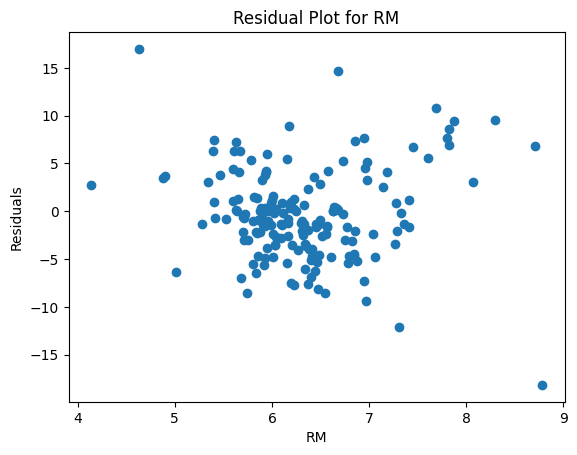

In [42]:
res = test_y - y_pred1
plt.scatter(test_x['RM'], res)
plt.xlabel("RM")
plt.ylabel("Residuals")
plt.title("Residual Plot for RM")
plt.show()